# Global params

In [2]:
img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
img_save_directory = '/home/ec2-user/autoencoder-vaegan/colbert-out'
model_weights_path = '/home/ec2-user/colbert-auto-plain-weights.hdf5'
batch_size = 64
training_set_size = 3264
img_size = 128

# Imports and helper functions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

# Load training data

In [4]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])
np.random.shuffle(training)

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


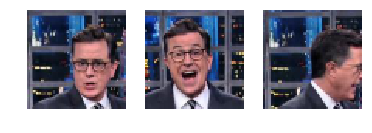

In [5]:
imshow([training[i] for i in range(100,103)])

# Create model and load weights

Instantiate model

In [5]:
from autoencoder import Autoencoder
from keras.optimizers import Adam

model = Autoencoder(img_shape=(img_size, img_size, 3), batch_size=batch_size)
model.build_model()

Using TensorFlow backend.


Compile model

In [6]:
model.model.compile(Adam(lr=.00001), 'binary_crossentropy')
# model.model.compile(Adam(lr=.000001), 'binary_crossentropy')

Load weights

In [10]:
if (True):
    model.model.load_weights(model_weights_path)

# Zach and latest output of Zach

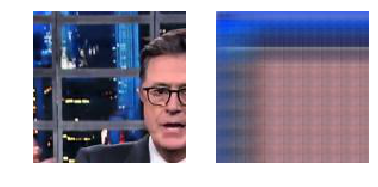

In [66]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[100], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

# Train

Reset image save filename counter

In [7]:
save_idx = 0

Define some useful Keras callbacks

In [ ]:
# save an image of prediction before training
# predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
# path = os.path.join(img_save_directory, '%04d.jpg' % save_idx)
# sp.misc.imsave(path, predictions[0])
# save_idx += 1

start = save_idx
stop = save_idx + 9999

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True)
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    model.model.save_weights(model_weights_path)
    save_idx = i

Epoch 1/1
3264/3264 [==============================] - 26s - loss: 2616.5126    
Epoch 1/1
3264/3264 [==============================] - 21s - loss: 1386.8139    
Epoch 1/1
3264/3264 [==============================] - 21s - loss: 863.3074    
Epoch 1/1
3264/3264 [==============================] - 21s - loss: 544.0155    
Epoch 1/1
3264/3264 [==============================] - 21s - loss: 361.9960    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 264.3059    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 201.9428    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 162.1117    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 133.7577    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 114.2592    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 99.0731    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 86.4485    
Epoch 1/1
3264/3264 [===================

3264/3264 [==============================] - 22s - loss: 3.6469    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.6758    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.6363    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.6899    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.5153    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.4702    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.3011    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.3908    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.2817    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.1489    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.3058    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.2983    
Epoch 1/1
3264/3264 [==============================] - 22s - loss: 3.1778 

In [17]:
from keras import backend as K
K.eval(model.model.optimizer.lr)

9.9999997e-06

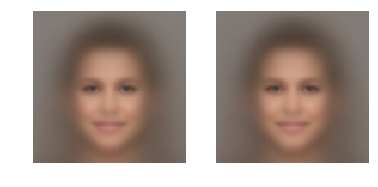

In [57]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
imshow([predictions[0], predictions[7]])